Let $$f \in C[0,1]$$  in face this works for any k-cell  then $$\lim_{n\to \infty} P_n(x)=f(x)$$ where
\[
P_n(x)= \sum_{k=0}^nf\left(\frac{k}{n}\right)\frac{n!}{k!(n-k)!}x^k(1-x)^{n-k}   
\]

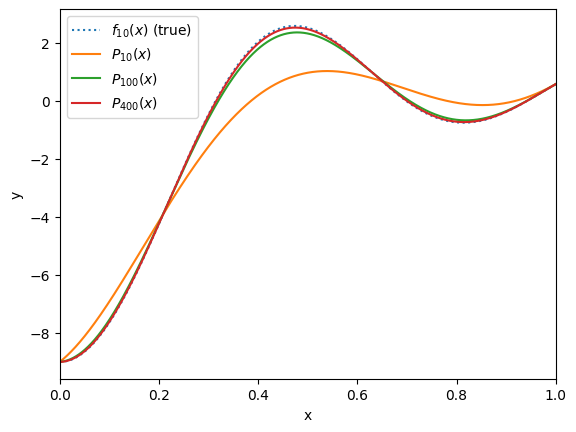

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt


def f10(x):
    terms = [ -j*np.cos(j * x) for j in range(1, 10)]
    
    return sum(terms) 


def P_n_general(x, n, f, L):
    x = np.asarray(x)
    u = x / L
    k = np.arange(n + 1)
    coeffs = np.array([math.comb(n, ki) for ki in k])[:, np.newaxis]
    f_vals = np.array([f((ki / n) * L) for ki in k])[:, np.newaxis]
    U_pow = u[np.newaxis, :] ** k[:, np.newaxis]
    Um1_pow = (1 - u)[np.newaxis, :] ** (n - k)[:, np.newaxis]
    return np.sum(f_vals * coeffs * U_pow * Um1_pow, axis=0)


L = np.pi
x = np.linspace(0, 1, 4000)


y_true = f10(x)
n_values = [10,100, 400]
approximations = {n: P_n_general(x, n, f10, 1) for n in n_values}

# Plot
plt.figure()
plt.plot(x, y_true, linestyle=':', label=r'$f_{10}(x)$ (true)')
for n, y_approx in approximations.items():
    plt.plot(x, y_approx, label=f'$P_{{{n}}}(x)$')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.xlim(0, 1)
plt.show()
